In [1]:
class Point:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z 
        
    def multiply(self, multiplier):
        return Point(self.x * multiplier, self.y * multiplier, self.z * multiplier)
    
    def divide(self, divider):
        return Point(self.x / divider, self.y / divider, self.z / divider)
    
    def __add__(self, otherPoint):
        return Point(self.x + otherPoint.x, self.y + otherPoint.y, self.z + otherPoint.z)
    
    def __sub__(self, otherPoint):
        return Point(self.x - otherPoint.x, self.y - otherPoint.y, self.z - otherPoint.z)
        
        
class deCasteljau:
    def __init__(self, points):
        self.points = points
    
    def b(self,r,i,t):
        
        #print("r: ", r)
        #print("i: ", i)
        
        if r == 0:
            return self.points[i];
        
        return  self.b(r - 1, i, t).multiply(1 - t) +  self.b(r - 1, i + 1, t).multiply(t)
    
def factorial(n):
    fact = 1
    for i in range(1,n+1): 
        fact = fact * i 
    return fact

def binomial(n, i):
    if (i >= 0 and i <= n):
        return factorial(n)/(factorial(i) * factorial(n - i))
    else:
        return 0
    
class Berstein:

    def B(self, n, i, t):
        
        if (n == 0 and i == 0):
            return 1
        elif (i > n or i < 0):
            return 0
        
        return (1 - t) * self.B(n - 1, i, t) + t * self.B(n - 1, i - 1, t)
        

<IPython.core.display.Javascript object>


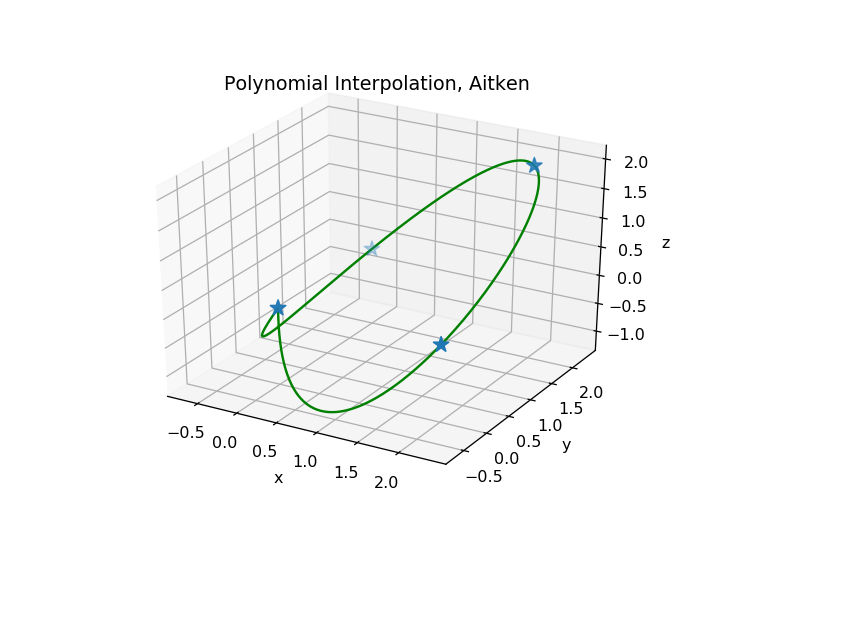

In [2]:
import copy

from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

tparam = [0,1,2,3,4]
points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

newpoint = list()

def prn(r, i, t, tparam, pts):    
    if (r == 0):
        return pts[i]
    
    newp = (prn(r - 1, i, t, tparam, points).multiply((tparam[i + r] - t) / (tparam[i + r] - tparam[i])) + 
        prn(r-1, i + 1, t, tparam, points).multiply((t - tparam[i])/(tparam[i + r] - tparam[i])))
    return newp
                                    
n = 4
xline = list()
yline = list()
zline = list()
                                    
xpoints = list()
ypoints = list()
zpoints = list()
                                    
for px in points:
    xpoints.append(px.x)
    ypoints.append(px.y)
    zpoints.append(px.z)                               
                                    
                                    
for t in np.arange(0,4.01,0.01):
    p = prn(n, 0, t, tparam, points)
    xline.append(p.x)
    yline.append(p.y)
    zline.append(p.z)
                                    
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Polynomial Interpolation, Aitken')

ax.plot3D(xline, yline, zline, 'green')
ax.scatter(xpoints, ypoints, zpoints, marker='*',s=100)
                         
    

<IPython.core.display.Javascript object>


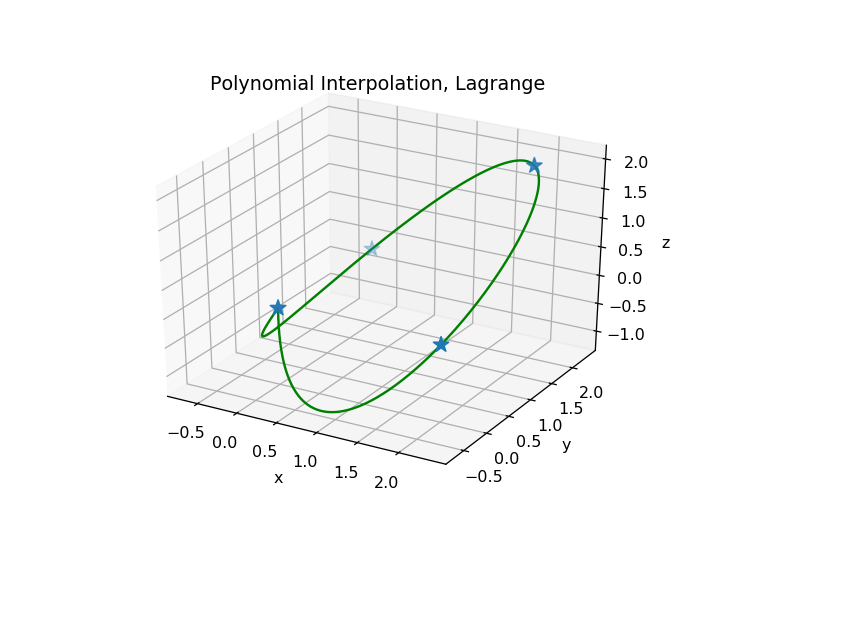

In [3]:
#6.2 p.84

#Lagrange Polynomials

import copy

from mpl_toolkits import mplot3d

%matplotlib notebook 
import numpy as np 
import matplotlib.pyplot as plt

tparam = [0,1,2,3,4] 

points = [Point(0,0,0), Point(0,2,0), Point(2,2,2), Point(2,0,0), Point(0,0,0)]

def lagrange(t, n, i, tparam, pts): 
    p1 = 1 
    for j in range(0,n + 1,1):
        if (j != i):
            p1 = p1 * (t - tparam[j])
            
    p2 = 1 
    for j in range(0,n + 1,1):
        if (j != i):
            p2 = p2 * (tparam[i] - tparam[j])
            
    ret = 0;
    
    if (p2 != 0):
        ret = p1 / p2
            
    return ret
        

def explicitform(t, pts, tparams): 
    n = len(pts) - 1 
    pt = Point(0,0,0) 
    for i in range(0,n + 1, 1): 
        pt = pt + pts[i].multiply(lagrange(t, n, i, tparams, pts))
    return pt

n = 4
xline = list()
yline = list()
zline = list()
                                    
xpoints = list()
ypoints = list()
zpoints = list()


for t in np.arange(0,4.01,0.01):
    p = explicitform(t,points, tparam)
    xline.append(p.x)
    yline.append(p.y)
    zline.append(p.z)
    

for px in points:
    xpoints.append(px.x)
    ypoints.append(px.y)
    zpoints.append(px.z)      

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Polynomial Interpolation, Lagrange')

ax.plot3D(xline, yline, zline, 'green')
ax.scatter(xpoints, ypoints, zpoints, marker='*',s=100)
                         

In [ ]:
#6.3 p. 85 
#The Vandermonde Approach

<IPython.core.display.Javascript object>


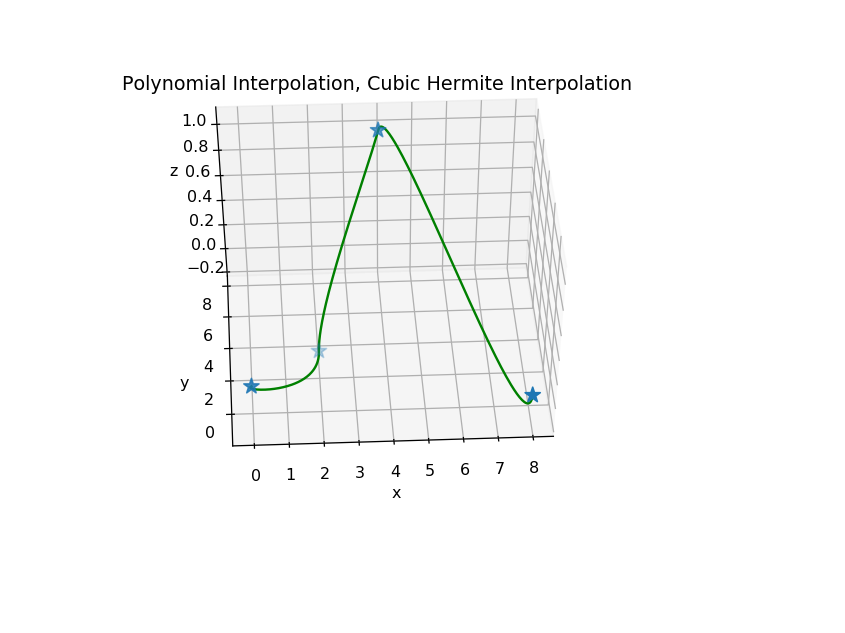

In [14]:
#6.5 p. 87
#Cubic Hermite Interpolation

import copy

from mpl_toolkits import mplot3d

%matplotlib notebook 
import numpy as np 
import matplotlib.pyplot as plt


def H0_3(t):
    Ber = Berstein()
    
    return Ber.B(3,0,t) + Ber.B(3,1,t)

def H3_1(t):
    Ber = Berstein()
    
    return Ber.B(3,1,t) *  (1/3)

def H3_2(t):
    Ber = Berstein()
    
    return Ber.B(3,2,t) * (-1/3)

def H3_3(t):
    Ber = Berstein()
    
    return Ber.B(3,2,t) + Ber.B(3,3,t)

def getpoint(p0, p1, m0, m1, t):
    return p0.multiply(H0_3(t)) + m0.multiply(H3_1(t)) + m1.multiply(H3_2(t)) + p1.multiply(H3_3(t))

points = [Point(0,0,0), Point(2,2,0), Point(4,8,1), Point(8,-1,0)]
tangent_vectors = [Point(-1,-1,0), Point(0,1,1), Point(1,0,1), Point(1,5,1)]

xline = list()
yline = list()
zline = list()

for c in range(0, len(points) - 1, 1):
    for t in np.arange(0,1 + 0.01,0.01):
        pt = getpoint(points[c], points[c + 1], tangent_vectors[c], tangent_vectors[c + 1], t)
        xline.append(pt.x)
        yline.append(pt.y)
        zline.append(pt.z)
    
xpoints = list()
ypoints = list()
zpoints = list()

for p in points:
    xpoints.append(p.x)
    ypoints.append(p.y)
    zpoints.append(p.z)
    
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Polynomial Interpolation, Cubic Hermite Interpolation')

ax.plot3D(xline, yline, zline, 'green')
ax.scatter(xpoints, ypoints, zpoints, marker='*',s=100)






    